# Installing Hub

In [ ]:
!pip3 install hub --quiet
import os 
os.kill(os.getpid(), 9) 

     |████████████████████████████████| 255 kB 4.3 MB/s 
     |████████████████████████████████| 81 kB 7.2 MB/s 
     |████████████████████████████████| 1.8 MB 57.7 MB/s 
     |████████████████████████████████| 3.0 MB 42.2 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 152 kB 56.7 MB/s 
     |████████████████████████████████| 545 kB 59.6 MB/s 
     |████████████████████████████████| 131 kB 67.6 MB/s 
     |████████████████████████████████| 5.8 MB 38.3 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 256 kB 52.3 MB/s 
     |████████████████████████████████| 105 kB 61.3 MB/s 
     |████████████████████████████████| 75 kB 3.5 MB/s 
     |████████████████████████████████| 109 kB 58.1 MB/s 
     |████████████████████████████████| 8.5 MB 37.5 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 127 kB 71.3 MB/s 
     |███████████████████

# Download raw dataset

In [1]:
from IPython.display import clear_output
from google.colab import files

In [2]:
# Download dataset here
!gdown --id 1JUx-EPoV9QAhQgmW0AyOen-xKQUzZia- 
!unzip PPM-100.zip
clear_output()

In [3]:
import hub
from PIL import Image 
import numpy as np 
import os
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
#@title Login to ActiveLoop
%env BUGGER_OFF=true
!activeloop login -u username -p password
!activeloop reporting --off

env: BUGGER_OFF=true
Successfully logged in to Activeloop.


# Creating dataset on hub

**Activeloop API** : https://docs.activeloop.ai/api-basics

In [19]:
filename_path = 'hub://activeloop/PPM100'
hub.delete(filename_path, force=True)

In [20]:
filename_path = 'hub://activeloop/ppm100'
ds = hub.dataset(filename_path)

Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/activeloop/ppm100.


In [21]:
with ds:
    ds.info.update(source='https://github.com/ZHKKKe/PPM')

    ds.create_tensor('images', htype='image', sample_compression='jpg')
    ds.create_tensor('masks', htype='binary_mask', sample_compression='lz4')

In [22]:
data_path = 'PPM-100'
os.listdir(data_path)

['matte', 'image']

In [23]:
with ds:
    for image in os.listdir('PPM-100/image/'):
        ds['images'].append(hub.read(os.path.join(data_path, 'image', image)))

        img = Image.open(os.path.join(data_path, 'matte', image))
        mask = np.array(img,dtype='uint8')
        ds['masks'].append(mask.astype('bool'))

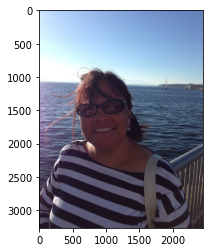

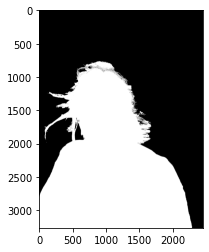

In [24]:
index = 0
image = ds['images'][index].numpy()
matte = ds['masks'][index].numpy()
plt.imshow(image)
plt.show()
plt.imshow(matte, cmap='gray')
plt.show()

# Testing dataset from Hub

In [27]:
ds = hub.load(filename_path)
# print tensor shapes
images = ds.images.numpy(aslist=True)
masks = ds.masks.numpy(aslist=True)

hub://activeloop/ppm100 loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/ppm100.


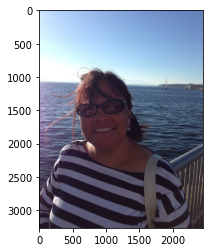

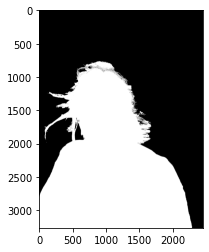

In [28]:
index = 0
plt.imshow(images[index])
plt.show()

plt.imshow(masks[index], cmap='gray')
plt.show()